In [1]:
import utils
import skimage
import skimage.morphology
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [2]:
def fill_holes(im: np.ndarray, starting_points: list, num_iterations: int) -> np.ndarray:
    """
        A function that takes a binary image (im),  and a set of points 
        indicating position of holes, and fills the holes.

        args:
            im: np.ndarray of shape (H, W) with boolean values (dtype=np.bool)
            starting_points: list of list containing starting points (row, col). Ex:
                [[row1, col1], [row2, col2], ...]
            num_iterations: integer defining the number of iterations to apply the 
                            hole filling algorithm
        return:
            (np.ndarray) of shape (H, W). dtype=np.bool
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    structuring_element = np.ones((3, 3), dtype=bool) # Define the structuring element
    X_0 = np.zeros(im.shape, dtype=bool)              # Zero array to store the result
    for point in starting_points:
        X_0[point[0], point[1]] = True           # Set the starting points to True
    for k in range(0, num_iterations):
        X_0 = skimage.morphology.binary_dilation(X_0, footprint=structuring_element) # Dilation
        im_c = np.logical_not(im)            # Complement of image
        X_0 = np.logical_and(X_0, im_c)      # Intersection of the dilation and complement of image
    result = np.logical_or(im, X_0)          # Union of the original image and the filled holes
    return result
    ### END YOUR CODE HERE ### 

In [3]:
if __name__ == "__main__":
    im = io.imread('images/cards.png', as_gray=True)
    binary_image = im != 0
    starting_points = [ 
        # (row, column)
        [50, 80],
        [275, 80],
        [50, 175],
        [275, 175],
        [50,390],
        [275, 390],
        [175,650]
    ]
    num_iterations = 50

    result = fill_holes(binary_image, starting_points, num_iterations)

    assert im.shape == result.shape, "Expected image shape ({}) to be same as resulting image shape ({})".format(
            im.shape, result.shape)
    assert result.dtype == bool, "Expected resulting image dtype to be bool. Was: {}".format(
            result.dtype)

    result = utils.to_uint8(result)
    utils.save_im("cards-filled.png", result)


Saving image to: image_processed\cards-filled.png


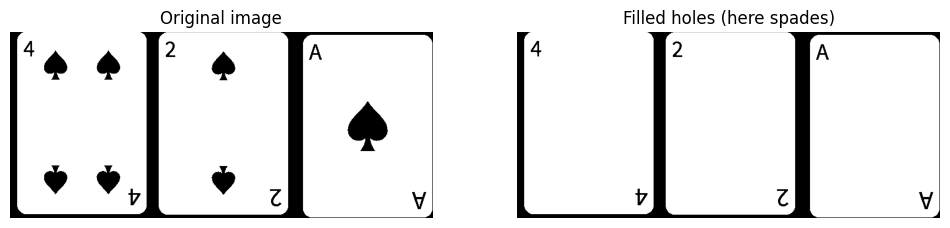

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(im, cmap='gray')
axes[0].set_title('Original image')
axes[1].imshow(result, cmap='gray')
axes[1].set_title('Filled holes (here spades)')
for a in axes:
    a.axis('off')